# 2019-06-03일의 서울 지하철 무임 승차/하차 분석하기

# < 분석 목표 >

**1. 엑셀파일 불러오기 및 출력**                                                                         
**2. 무임 승차, 하차를 나누기**                                                 
**3. 상위 20개를 추출하기**    
**4. 오름차순 및 내림차순 정렬**                           
**5. 어느역이 가장 승차 / 하차가 많은지 그래프로 확인**                                                              
**6. 어느역이 가장 승차 / 하차가 적은지 그래프로 확인**                                                       

CSV파일 출처 : 서울열린데이터광장                                                                                       
링크 : https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-12251&srvType=S&serviceKind=1&currentPageNo=3&searchValue=&searchKey=null

# 패키지 로드

**<분석을 위한 패키지>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wa

**<한글깨짐 방지를 위한 패키지 로드>**

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. 엑셀파일 불러오기 및 출력

In [5]:
A = pd.read_csv("06-03 무임승차.csv", engine = "python") # engine()을 안 넣으면 에러가 발생하니 주의하자.

In [4]:
A.head()

,호선명,지하철역,무임승차인원,무임하차인원,작업일자
0,1호선,서울역,247801,242107,20190603
1,우이신설선,북한산우이,41660,41735,20190603
2,우이신설선,성신여대입구(돈암),34415,32373,20190603
3,우이신설선,화계,42866,43383,20190603
4,우이신설선,정릉,48775,45712,20190603


In [6]:
A = A[["호선명", "지하철역", "무임승차인원", "무임하차인원"]] # 작업일자 제외

# 2. 무임 승차 / 하차를 나누어서 출력

**<무임승차>**

In [9]:
A_승 = A[["호선명", "지하철역", "무임승차인원"]]

**<무임하차>**

In [10]:
A_하 = A[["호선명", "지하철역", "무임하차인원"]]

In [12]:
A_승.head(3)

,호선명,지하철역,무임승차인원
0,1호선,서울역,247801
1,우이신설선,북한산우이,41660
2,우이신설선,성신여대입구(돈암),34415


In [13]:
A_하.head(3)

,호선명,지하철역,무임하차인원
0,1호선,서울역,242107
1,우이신설선,북한산우이,41735
2,우이신설선,성신여대입구(돈암),32373


# 3. 오름차순 및 내림차순 정렬

**<오름차순>**

In [27]:
Min_승 = A_승.sort_index(by = "무임승차인원", ascending = True)
Min_하 = A_하.sort_index(by = "무임하차인원", ascending = True)

wa.filterwarnings(action = 'ignore') # 워닝 메세지 숨김

In [28]:
Min_승.head(3)

,호선명,지하철역,무임승차인원
95,분당선,복정,0
183,경의선,김포공항,0
194,경의선,서울역,0


In [29]:
Min_하.head(3)

,호선명,지하철역,무임하차인원
95,분당선,복정,0
231,경원선,창동,0
191,경의선,검암,0


**<내림차순>**

In [30]:
Max_승 = A_승.sort_index(by = "무임승차인원", ascending = False)
Max_하 = A_하.sort_index(by = "무임하차인원", ascending = False)

In [31]:
Max_승.head(3)

,호선명,지하철역,무임승차인원
596,1호선,종로3가,408682
589,1호선,제기동,353695
594,1호선,청량리(서울시립대입구),336216


In [32]:
Max_하.head(3)

,호선명,지하철역,무임하차인원
596,1호선,종로3가,382809
589,1호선,제기동,375436
594,1호선,청량리(서울시립대입구),341637


**<인덱스 번호 초기화>**

In [33]:
Max_승 = Max_승.reset_index(drop = True)
Min_승 = Min_승.reset_index(drop = True)
Max_하 = Max_하.reset_index(drop = True)
Min_하 = Min_하.reset_index(drop = True)

# 4. 상위 20개 출력

## 무임 승/하차 가 가장 많은 역

In [35]:
Max_승 = Max_승.head(20)
Max_하 = Max_하.head(20)

## 무임 승/하차 가 가장 적은 역

In [36]:
Min_승 = Min_승.head(20)
Min_하 = Min_하.head(20)

# 5. 무임승 / 하차가 가장 많은 역을 그래프로 표현

### <승차>

아래의 그래프를 보면 **무임승차가 가장 많은 역은 종로3가, 제기동, 청량리 역 등이 있다.**

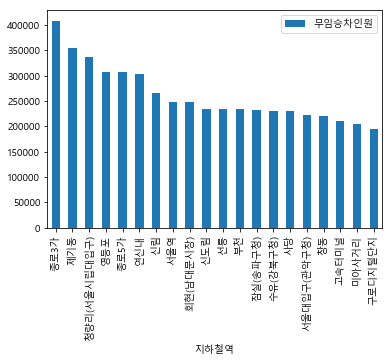

In [39]:
Max_승.plot(kind = "bar", x = "지하철역")

## <하차>

아래의 그래프를 보면 **무임하차가 가장 적은 역은 종로3가, 제기동, 청량리로 무임승차와 동일하다는 것을 알 수 있다.**

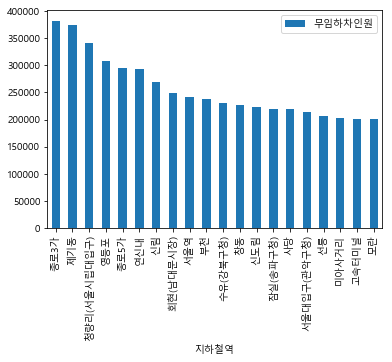

In [40]:
Max_하.plot(kind = "bar", x = "지하철역")

# 6. 무임 승차가 가장 적은 역을 그래프로 표현

## <승차>

아래의 그래프를 보면 **무임승차가 가장 적은 역은 복정, 김포공항, 서울역, 검암, 창동, 연신내, 계약, 충무로 역으로 0 인것을 알 수 있다.**

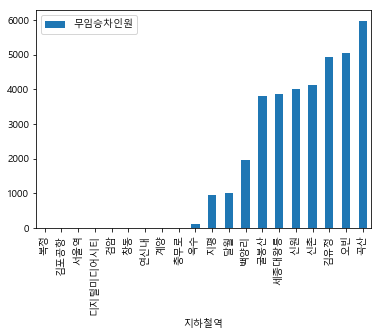

In [41]:
Min_승.plot(kind = "bar", x = "지하철역")

## <하차>

아래의 그래프를 보면 **무임하차가 가장 적은 역은 복정, 창동, 검암, 서울역, 디지털미디어시티, 김포공항, 계양, 연신내, 충무로 역으로 0인 것을 알 수 있다.**

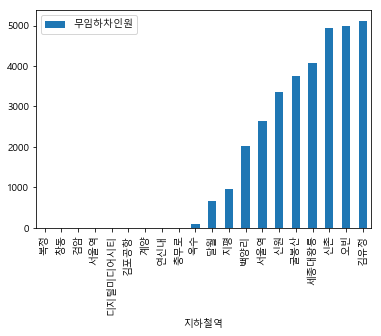

In [42]:
Min_하.plot(kind = "bar", x = "지하철역")